# Content: 
   - [Importing Data](#1)
   - [Create RNN Model](#2)

In [134]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt



<a id="1"></a>
# Importing Data

In [135]:
# importing the training set
data_train = pd.read_csv("Google_Stock_Price_Train.csv")
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [136]:
train = data_train.loc[:,["Open"]].values
print(train.shape)
print(train)

(1258, 1)
[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [137]:
# Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

train_scaled = scaler.fit_transform(train)
print(train_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [138]:
# create a data structure with 50 timesteps and 1 output

x_train = []
y_train = []
timesteps = 5

for i in range(timesteps, 1258):
    x_train.append(train_scaled[i - timesteps:i])
    y_train.append(train_scaled[i])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)
# print(y_train)


[[[0.08581368]
  [0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]
  [0.0585423 ]]

 ...

 [[0.96294367]
  [0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [139]:
# Reshaping

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# print(x_train)
# print(y_train)

<a id="2"></a>
# Create RNN Model

In [140]:
# Create RNN Model

# Importing the Keras Libraries and packages
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

# initialisinig the RNN
regressor = Sequential()

# adding the first RNN layer and some Dropout regularisation 
regressor.add(SimpleRNN(units = 100, activation="relu", return_sequences=True ,input_shape = (x_train.shape[1], 1)))
# regressor.add(Dropout(0.2))

# adding the second RNN layer and some Dropout regularisation 
regressor.add(SimpleRNN(units = 100, activation="relu", return_sequences=True))
# regressor.add(Dropout(0.2))

# adding the third RNN layer and some Dropout regularisation 
regressor.add(SimpleRNN(units = 100 , activation="relu", return_sequences=True))
# regressor.add(Dropout(0.2))

# adding the fourth RNN layer and some Dropout regularisation 
regressor.add(SimpleRNN(units = 100))
# regressor.add(Dropout(0.2))

# Adding thw output Layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer= "adam", loss = "mse")

# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 10, batch_size = 1)

Epoch 1/10
1253/1253 [==============================] - 4s 3ms/step - loss: 0.0047
Epoch 2/10
1253/1253 [==============================] - 4s 3ms/step - loss: 0.0014
Epoch 3/10
1253/1253 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 4/10
1253/1253 [==============================] - 6s 5ms/step - loss: 0.0012
Epoch 5/10
1253/1253 [==============================] - 7s 6ms/step - loss: 9.0809e-04
Epoch 6/10
1253/1253 [==============================] - 7s 6ms/step - loss: 8.0000e-04
Epoch 7/10
1253/1253 [==============================] - 5s 4ms/step - loss: 7.6722e-04
Epoch 8/10
1253/1253 [==============================] - 6s 4ms/step - loss: 8.1184e-04
Epoch 9/10
1253/1253 [==============================] - 6s 5ms/step - loss: 7.7549e-04
Epoch 10/10
1253/1253 [==============================] - 5s 4ms/step - loss: 6.8156e-04


In [141]:
# Getting the real stock price of 2017

data_test = pd.read_csv("Google_Stock_Price_Test.csv")
data_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [142]:
real_stock_price = data_test.loc[:, ["Open"]].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [164]:
# Getting the predicted stock price of 2017

data_total = pd.concat((data_train["Open"], data_test["Open"]), axis = 0)
# print(data_total)
inputs = data_total[len(data_total) - len(data_test) - timesteps:].values.reshape(-1,1)
print(inputs)
inputs = scaler.transform(inputs) # min max scaler
# inputs

[[790.9 ]
 [790.68]
 [793.7 ]
 [783.33]
 [782.75]
 [778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


1/1 [==============================] - 0s 13ms/step


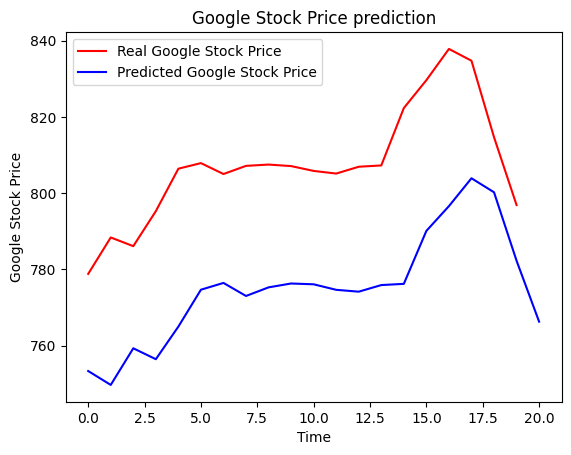

In [160]:
x_test = []
for i in range(timesteps, 70):
    if len(inputs[i-timesteps:i]) == timesteps:
        x_test.append(inputs[i-timesteps:i])

x_test = np.array(x_test)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicte_stock_price = regressor.predict(x_test)
predicte_stock_price = scaler.inverse_transform(predicte_stock_price)

# visualising the results
plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
plt.plot(predicte_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

In [161]:
print(predicte_stock_price)

[[753.3317 ]
 [749.6855 ]
 [759.295  ]
 [756.4305 ]
 [764.98566]
 [774.6554 ]
 [776.43726]
 [773.01416]
 [775.2729 ]
 [776.288  ]
 [776.0748 ]
 [774.6282 ]
 [774.1408 ]
 [775.8755 ]
 [776.19415]
 [790.0884 ]
 [796.57526]
 [803.8864 ]
 [800.2135 ]
 [782.2615 ]
 [766.2749 ]]
